<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Virus_Mnist_UnSolved_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

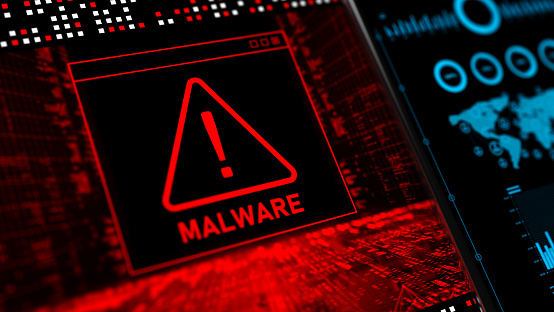

### Research paper : https://www.researchgate.net/publication/349704527_Virus-MNIST_A_Benchmark_Malware_Dataset

Download the original research paper of Virus Mnist detection through the above provided link. And read the research paper before moving ahead.

## Uncomment below cells and run all of them

### Download the data:- https://www.kaggle.com/datasets/datamunge/virusmnist
Unzip the file and upload the train.csv and test.csv file in colab.



# Problem

The problem is a Multiclass Classification Problem

The dataset used for this problem is VIRUS MNIST dataset


# Problem Statement

To classify the virus(malware) images using Convoluton Neural Net

# Dataset Description:

The dataset for image classification consisting of 10 classes of virus.

The dataset folder contains the following files:

train.csv: 48422 rows x 1026 columns

test.csv: 3458 rows x 1026 columns


The images are of size 32x32

The dataset already have pixels in 1 x 1024 columns.


True (Actual) label are encode with a single integer number

In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np



# Load Dataset

In [ ]:
# reading dataset train, test
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")


In [ ]:
# visualizing first five samples of train dataset
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,hash
0,3,212,1,77,204,137,117,139,161,199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aa527b5aea9fe96fabae78e85ba59491
1,0,0,19,3,233,127,0,70,1,233,...,104.0,28.0,233.0,150.0,115.0,173.0,126.0,27.0,64.0,05597db8265479234c8e15a7290cd7f0
2,1,0,181,232,0,0,141,133,255,221,...,116.0,223.0,203.0,183.0,56.0,59.0,62.0,50.0,51.0,b1375b03e66c56e9a733eaf3d2a5bdbd
3,5,130,109,153,224,84,51,235,254,64,...,183.0,113.0,255.0,113.0,31.0,183.0,113.0,255.0,113.0,78ccbc945556b3f2aefd13f6ca31dcde
4,1,81,141,255,232,0,198,247,221,0,...,61.0,69.0,36.0,48.0,133.0,61.0,147.0,178.0,60.0,0748ba9db029cbfa01d73d2ee45222bf


In [ ]:
# visualizing first five samples of test dataset
test.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,hash
0,2,0,199,51,23,0,0,227,255,127,...,0,0,0,0,0,0,0,0,0,24ced6eb4c3b6b16e6d911401ca9b9bf
1,6,0,0,4,24,56,93,220,101,80,...,72,142,247,1,247,27,121,109,75,9c9133f89cf857325fd041ca8640d51b
2,9,116,139,255,244,252,137,139,139,255,...,108,73,3,105,85,183,102,171,7,13544f465094166da9ad6f04833c4a7f
3,1,64,195,0,80,0,200,139,51,84,...,64,158,0,52,55,38,65,174,245,351e6e7a74a58fe57b323925d30b3943
4,7,255,4,0,73,3,15,0,48,15,...,9,0,10,11,186,0,10,13,128,6b537c7aa5719b881e2039bb055fa09f


In [ ]:
# check the size of train and test dataset
len(test)
#print('numbern of samples in test:')


3458

In [ ]:
len(train)

3391

In [ ]:
# check the number of classes and names of classes
train['label'].unique()


array([3, 0, 1, 5, 6, 8, 2, 7, 9, 4])

In [ ]:
train['label'].nunique()

10

In [ ]:
# drop the 'hash' column
train.drop('hash',axis=1,inplace=True)
test.drop('hash',axis=1,inplace=True)


In [ ]:
# seperate train data and train labels
train_label=train['label']
train_data=train.drop('label',axis=1)
test_label=test['label']
test_data=test.drop('label',axis=1)
train_data=train_data.to_numpy()
train_label=train_label.to_numpy()
test_label=test_label.to_numpy()
test_data=test_data.to_numpy()


In [ ]:
# seperate test data and test labels
len(train_data),len(train_label)



(3391, 3391)

In [ ]:
# Separate train data and train labels
train_label = train['label']
train_data = train.drop('label', axis=1)
test_label = test['label']
test_data = test.drop('label', axis=1)

# Convert to NumPy arrays (no need for np.array() again if already using .to_numpy())
x_train = train_data.to_numpy()  # Training features
y_train = train_label.to_numpy()  # Training labels
x_test = test_data.to_numpy()    # Test features
y_test = test_label.to_numpy()   # Test labels

# Optional: Print shapes to verify
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
train_labels_df_np = train.to_numpy()  # Converts entire DataFrame to NumPy array

Training data shape: (3391, 1024)
Training labels shape: (3391,)
Test data shape: (3458, 1024)
Test labels shape: (3458,)


# Let's resize and scale the images to save time in training

## What is the need to do resizing into 32x32?

The models we are going to use takes input image as 32x32 but we have data in form of 1x1024.

In [ ]:
# First ensure your data is numerical
import numpy as np

def prep(images, labels):
    # Convert to numpy array if not already
    if not isinstance(images, np.ndarray):
        images = np.array(images)

    # Check if elements are strings
    if images.dtype == object or images.dtype.type is np.str_:
        raise ValueError("Input contains string data - need numerical image data")

    resized_images = []

    for image in images:
        # Ensure the image is numerical and can be reshaped
        reshaped = image.reshape(32, 32)
        resized_images.append(reshaped)

    images_array = np.array(resized_images) / 255.0
    return images_array, labels

In [ ]:

import numpy as np

def prep(df, labels):
    images = df.to_numpy()  # Convert DataFrame to NumPy
    images = images.reshape(-1, 32, 32)  # Reshape to (n_samples, height, width)
    images = images / 255.0  # Normalize
    return images, labels

# Process test data
test_data_processed, test_label = prep(test_data, test_label)
print("Processed shape:", test_data_processed.shape)

Processed shape: (3458, 32, 32)


In [ ]:
# pass train and test data for resizing and scaling respectively
train_data,train_label=prep(train_data,train_label)


# Ploting resized and scaled sample images

Ploting image data with their shape and true label as plot title

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_samples(dataset, labels):
    # Set up 3x3 grid for 9 sample images
    n_rows = 3
    n_cols = 3
    fig = plt.figure(figsize=(10, 10))  # Adjust figure size as needed

    i = 1  # Subplot index counter

    # Loop through first 9 samples
    for image, label in zip(dataset[:9], labels[:9]):
        # Create subplot
        ax = fig.add_subplot(n_rows, n_cols, i)

        # Display image (use squeeze to handle single-channel images if needed)
        plt.imshow(np.squeeze(image), cmap='gray')  # Use 'gray' for grayscale images

        # Add title with shape and label
        ax.set_title(f"Shape: {image.shape}\nLabel: {label}", fontsize=8)

        # Remove axis ticks for cleaner look
        ax.set_xticks([])
        ax.set_yticks([])

        i += 1  # Increment subplot counter

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage:
# show_samples(x_train, y_train)

In [ ]:
# --- 5. Preprocess Data (Reshape and Scale) ---
# The pixel data is in 1x1024 format. We need to reshape it to 32x32
# and scale the pixel values to be between 0 and 1.

# --- 1. Load Dataset ---
# Assuming train.csv and test.csv are uploaded or available in the environment
print("Loading dataset...")
try:
    train_df = pd.read_csv("/content/train.csv")
    test_df = pd.read_csv("/content/test.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: CSV files not found. Please ensure 'train.csv' and 'test.csv' are in the '/content/' directory.")
    # Exit or handle the error appropriately, e.g., by providing instructions.
    # For this example, we'll stop execution after the message.
    exit()
def preprocess_images(dataframe):
    """
    Converts pixel DataFrame to NumPy array, reshapes to 32x32, and scales.
    ... (rest of function)
    """
    images_np = dataframe.to_numpy()  # This line is correct when dataframe is a pandas DataFrame/Series
    images_reshaped = images_np.reshape(-1, 32, 32)
    images_scaled = images_reshaped / 255.0
    return images_scaled

# --- 4. Separate data and labels ---
# Separate features (pixel data) from labels.
print("\nSeparating features and labels...")
x_train_raw = train_df.drop('label', axis=1)
y_train = train_df['label']
x_test_raw = test_df.drop('label', axis=1)
y_test = test_df['label']

# Convert labels to NumPy arrays (integer encoding is suitable for SparseCategoricalCrossentropy)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print("Separation complete.")

Loading dataset...
Dataset loaded successfully.

Separating features and labels...
Separation complete.


In the above cell we plotted 9 images from the dataset to visualize them. Each image consist of a title representing its shape and respective label/class.

# Converting image data to RGB
The data we have is 32x32x1 i.e grayscale But the models we are going to use are pretrained on 3 dimensional images. Thus we need to convert these images to 3 dimensional images.

# Note:

Even though we converted the data to three dimensional image data, still the image in all the dimension is the same we are just repeating the same grayscale image 3 time so that it appears as 3 dimensional to model. It does not affect the performance of the model.

for example:


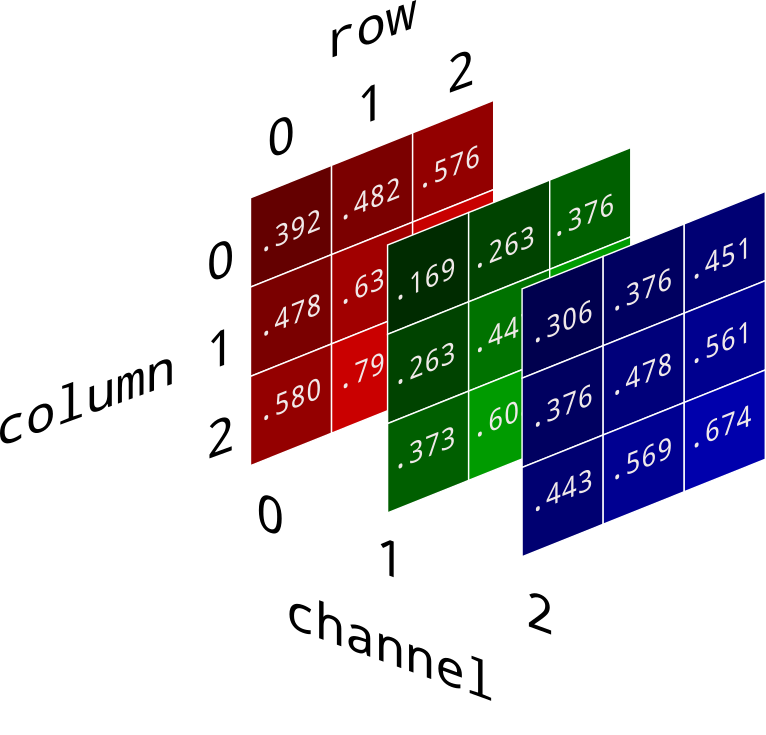


In the above image the image data is represented in RGB channels ie. 3 channel.
we will use the grayscale image and repeat that image 3 time for converting it to 3 channels. the same image matrice will be at channel 0, channel 1 and channel 2


In [ ]:
import numpy as np

def grayscale_to_rgb(images, scale_to_dim=3):
    """
    Convert grayscale images (1 channel) to RGB (3 channels) by repeating the channel.

    Parameters:
    - images: numpy array of shape (N, H, W) or (H, W) for grayscale images
    - scale_to_dim: number of output channels (default=3 for RGB)

    Returns:
    - RGB version of images with shape (N, H, W, 3) or (H, W, 3)
    """
    # Add channel dimension if missing (for single image case)
    if images.ndim == 2:
        images = images[np.newaxis, ..., np.newaxis]
    elif images.ndim == 3:
        images = images[..., np.newaxis]

    # Repeat along the channel dimension
    rgb_images = np.repeat(images, scale_to_dim, axis=-1)

    # Remove batch dimension if input was single image
    if rgb_images.shape[0] == 1 and images.ndim == 2:
        return rgb_images[0]
    return rgb_images

# Note :
In the above cell we used numpy.repeat to repeat the image pixel data to form 3 dimensional data from 1 dimensional image data. The ... in arr...] is used to make the repeat function to automaticaly select the number of indices the array has. If we use arr[:] than we need to specify how many indices we have
for example:
    
arr = [[0 1 2]  
      [3 4 5]]

arr[:,:, numpy.newaxis] --> for two dimensional array to convert into

arr = [[[0]  
  [1]  
  [2]]

 [[3]  
  [4]  
  [5]]]
  
and for 3 dimension -->  :,:,: and for 4 --> :,:,:,: so instead of using colons again and again we can use ... operator
  
and we need to repeat each element 3 times to form R,G,B
 values

so after using numpy.repeat(arr[..., numpy.newaxis], repeats=3, axis = -1)

we will get array in such a way:

arr = [[[0 0 0]  
  [1 1 1]  
  [2 2 2]]

 [[3 3 3]  
  [4 4 4]  
  [5 5 5]]]


Training Samples (RGB):


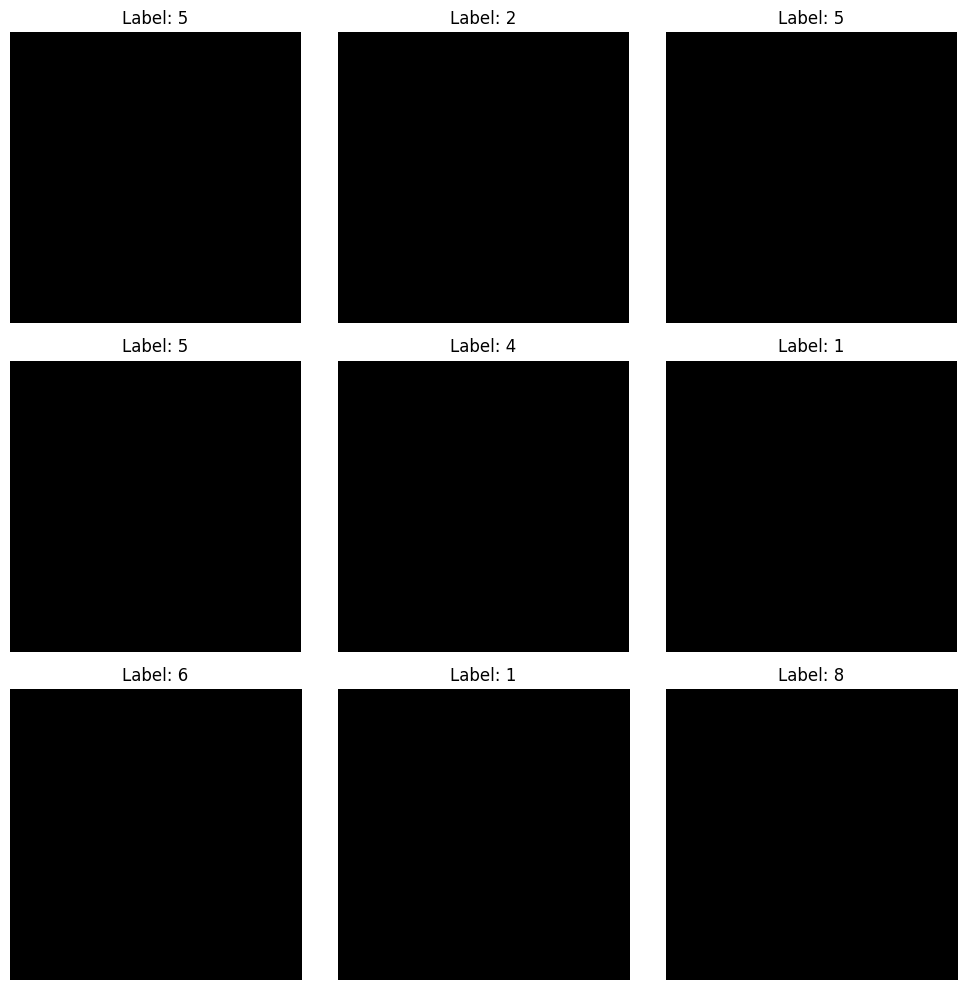

Test Samples (RGB):


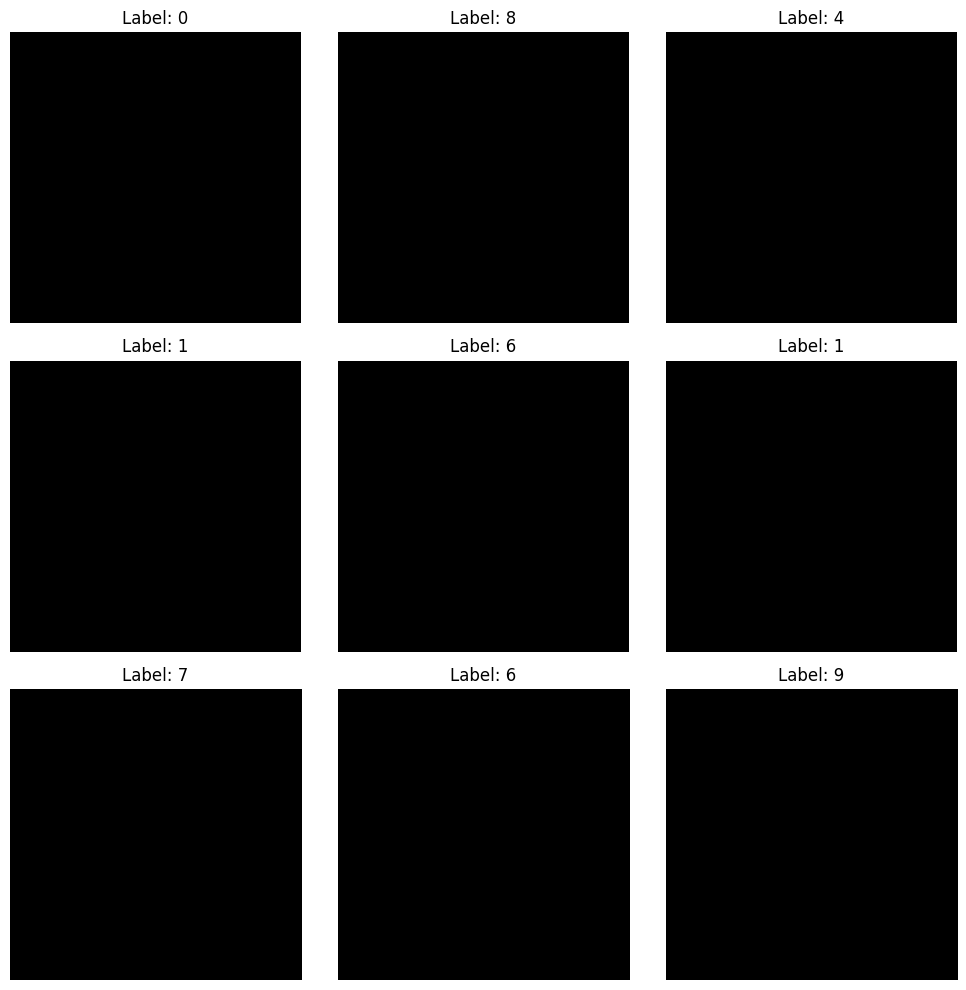

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Define the conversion function
def grayscale_to_rgb(images, scale_to_dim=3):
    """Convert grayscale images to RGB by repeating channels"""
    if images.ndim == 2:  # Single image
        return np.repeat(images[..., np.newaxis], scale_to_dim, axis=-1)
    elif images.ndim == 3:  # Batch of images
        return np.repeat(images[..., np.newaxis], scale_to_dim, axis=-1)
    return images

# 2. Define visualization function
def show_samples(dataset, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(np.squeeze(dataset[i]))
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 3. Generate sample data (replace with your actual data)
data = np.random.rand(100, 32, 32)  # 100 grayscale images
labels = np.random.randint(0, 10, 100)

# 4. Split and preprocess
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
x_train_processed = x_train / 255.0
x_test_processed = x_test / 255.0

# 5. Convert to 3-channel
x_train_rgb = grayscale_to_rgb(x_train_processed)
x_test_rgb = grayscale_to_rgb(x_test_processed)

# 6. Visualize
print("Training Samples (RGB):")
show_samples(x_train_rgb, y_train)

print("Test Samples (RGB):")
show_samples(x_test_rgb, y_test)

In the above cell we plotted 9 images from the dataset to visualize them. Each image consist of a title representing its shape and respective label/class.

### Note:
you can see that each image title shows 3 channel as images channel.

# To train faster we will be using Transer Learning with

## MobileNetV2 Model

MobileNet is a CNN architecture model for Image Classification and Mobile Vision. As compared to other models, running or applying transfer learning using  MobileNet consumes very less omputation power. Thus it can be used on devices such as Mobile devices, embedded systems and computers wthout GPU or low specification.
It runs well on browser as browser have computational limitation.


In [ ]:
# --- Build the Base Model (Transfer Learning) ---

# Import the MobileNetV2 model from TensorFlow's applications module
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input # Need the Input layer to define the entry point

# Define the input layer shape that matches your processed RGB image data
# Your processed data has a shape of (N, 32, 32, 3), so the input shape for one image is (32, 32, 3)
inputs = Input(shape=(32, 32, 3))

# Create a variable named base_model with MobileNetV2 model
# weights='imagenet': This loads the weights pre-trained on the ImageNet dataset.
# include_top=False: This removes the original classification layer (the "top")
#                      from the MobileNetV2 model. We will add our own later.
# input_tensor=inputs: This connects the base model to the custom input layer we defined above.
#                      This is important when you are using a non-standard input shape like 32x32
#                      (as MobileNetV2 was originally trained on larger images like 224x224).
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_tensor=inputs)

# Set base model trainable to False
# This freezes the weights of the MobileNetV2 base model layers.
# When we train the full model later, only the weights in the layers we add on top
# will be updated. This is a common first step in transfer learning.
base_model.trainable = False

print("MobileNetV2 base model created and frozen.")

<ipython-input-25-3b66cefdf57c>:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet',


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model created and frozen.


In [ ]:
# --- 9. Build Model (Adding Classification Head) ---

# Import the layers you will use
from tensorflow.keras.layers import (
    # Input,                   # Input layer is assumed to be defined in a previous block, but the class needs importing if not done already.
    GlobalAveragePooling2D,  # For pooling the features from the base model
    Dense                    # For the final classification layer
)
from tensorflow.keras.models import Model # Import the Model class itself

import tensorflow as tf
# Assume 'inputs' layer and 'base_model' (frozen) are defined from the previous block.
# (Make sure the cell defining 'inputs' and 'base_model' runs BEFORE this one)

# Get the number of classes from your problem description (Virus MNIST has 10 classes)
# In a full script, you might calculate this from your training labels:
# num_classes = train_df['label'].nunique()
# For this snippet, we'll use the value based on your comment:
num_classes = 10
print(f"\nNumber of output classes: {num_classes}")

# Add the custom classification head on top of the base model

# Add GlobalAveragePooling2D layer
# This layer converts the high-dimensional feature maps from the base model
# into a flat vector. Global Average Pooling averages the values for each filter
# across the width and height dimensions. This is a common way to transition
# from convolutional layers to dense layers.
x = GlobalAveragePooling2D()(base_model.output)
print("Added GlobalAveragePooling2D layer.")
# The output of this layer will have a shape of (None, 1280) for MobileNetV2

# define initializer for model i.e GlorotUniform for uniform distribution of tensor data
# An initializer determines how the initial weights of a layer are set.
# GlorotUniform (also known as Xavier uniform) is a standard choice that
# helps in stabilizing initial gradients, often paired with activation
# functions like ReLU (which MobileNetV2 uses extensively).
kernel_initializer = tf.keras.initializers.GlorotUniform()
# Corrected print statement to avoid KeyError (uses __class__.__name__)
print(f"Defined kernel initializer: {kernel_initializer.__class__.__name__}")


# create a variable to store activation, use any sigmoid, softmax (softmax recommended)
# Note: While you asked to store an activation and mentioned softmax,
# for multi-class classification using `SparseCategoricalCrossentropy`
# with `from_logits=True` (which is standard for integer labels and
# computationally stable), the *final* Dense layer should *not* have
# an activation function. The softmax operation is then handled internally
# by the loss function itself.
# We will define the Dense layer without activation.
# If you *did* want softmax here, you would add `activation='softmax'`.
final_activation = None # No activation on the final layer for from_logits=True loss
# If you were using CategoricalCrossentropy with one-hot labels AND wanted softmax here:
# final_activation = 'softmax'
print(f"Final layer activation: {final_activation}")


# Define a Dense layer
# This is the final fully connected layer that takes the pooled features
# and produces the raw scores (logits) for each of your 10 classes.
outputs = Dense(num_classes, kernel_initializer=kernel_initializer)(x)
# If you were using softmax activation here:
# outputs = Dense(num_classes, activation=final_activation, kernel_initializer=kernel_initializer)(x)
print(f"Added final Dense layer with {num_classes} units.")


# Create a model using the layers created
# The `Model` class allows you to define a model by specifying its input(s)
# and output(s). Here, the input is our initial `inputs` layer, and the output
# is the `outputs` layer (the final Dense layer). Keras automatically builds
# the graph of layers in between.
model = Model(inputs=inputs, outputs=outputs)
print("Final Model created.")

# --- Model Summary ---
# Print the model summary to see the layers, their output shapes,
# and the number of parameters. Notice that the base model layers
# have zero trainable parameters because we froze them.
print("\nModel Summary:")
model.summary()


Number of output classes: 10
Added GlobalAveragePooling2D layer.
Defined kernel initializer: GlorotUniform
Final layer activation: None
Added final Dense layer with 10 units.
Final Model created.

Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Note:
The last layer has 10 number of classes unit. So the output(predicted labels) will be 10 floating points as the actual label is a single integer number.

For the last layer, the activation function can be:
1. None
2. sigmoid
3. softmax

When there is no activation function used inthe model's last layer, we need to set from_logits=True in cross-entropy loss function during compiling model. This loss function will apply sigmoid transformation on predicted label values

### Let's see the model summary

In [ ]:
# --- Visualize Model Summary ---
# Print the summary of the built model.
# This shows the layers, their order, the output shape of each layer,
# and the number of parameters (trainable and non-trainable).
print("\nModel Summary:")
model.summary()

print("Model summary visualized.")


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model summary visualized.



We used a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

We applied a tf.keras.layers.Dense layer to convert these features into a 10 prediction per image.

### Note : The 2,257,984 parameters in MobileNet are frozen, but there are 12,810 trainable parameters in the Dense layer.

# Note:

The 'None' values in the output shapes of the layers: a reminder that the model expects the input to have a batch size as the outermost dimension, which in this case can be flexible due to the None value.

The model takes input of 32x32x3 shaped images.

The

## Compile the model

Compile the model before training it. Since there are 10 classes, use the tf.keras.losses.SparseCategoricalCrossentropy loss with from_logits=True (if activation function is not mentioned while creating model) since the model provides a linear output

In [ ]:
# --- 10. Compile the model ---

# Assume 'model' is defined from the previous steps.

# Get the number of classes (already defined in the model building block)
# num_classes = 10 # Make sure num_classes is accessible here if needed for context

print("\nCompiling the model...")

# Compile the model:
model.compile(
    # Optimizer: Determines how the model's weights are adjusted during training
    # 'adam' is a popular and generally effective choice. You could also use
    # tf.keras.optimizers.Adam(...) for more fine-grained control (e.g., learning rate).
    optimizer='adam',

    # Loss Function: Measures how "wrong" the model's predictions are.
    # We're using SparseCategoricalCrossentropy for multi-class classification
    # with integer labels (like 0, 1, 2...).
    # from_logits=True is essential because our final Dense layer outputs raw scores (logits),
    # not probabilities after a softmax activation. The loss function applies
    # the softmax internally for numerical stability.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

    # Metrics: How the model's performance is evaluated.
    # 'accuracy' is a common metric. Since we're using integer labels,
    # Keras automatically uses SparseCategoricalAccuracy when you just write 'accuracy'.
    # Explicitly using tf.keras.metrics.SparseCategoricalAccuracy is also good practice
    # and can sometimes help clarify intent or avoid ambiguity.
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')] # Using the explicit metric and naming it
)

print("Model compiled.")


Compiling the model...
Model compiled.


# IMPORTANT:
We need to use tf.keras.metrics.SparseCategoricalAccuracy() for measuring accuracy since it calculates how often prediction match integer labels.

If you select mistakenly categorical cross entropy as loss function in a binary classification and if you do not specify a particular accuracy metric by just writing

metrics = "Accuracy"

Keras will wrongly infer that you are interested in the categorical_accuracy, and this is what it returns - while in fact you are interested in the binary_accuracy since our problem is a binary classification


Visualizing model architecture diagram...
Model architecture diagram saved as 'model_architecture.png'.

Displaying model architecture diagram:


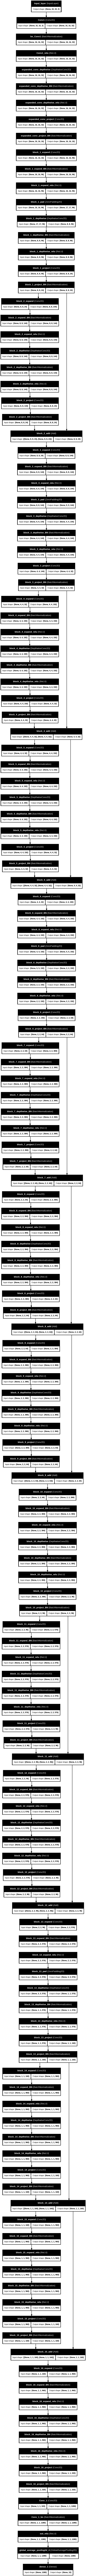

Attempted model architecture visualization.


In [ ]:
# --- Visualize Model Architecture Diagram ---

# Import the utility for plotting models
from tensorflow.keras.utils import plot_model

# Assume 'model' is defined and compiled from the previous steps.

print("\nVisualizing model architecture diagram...")

# Generate the plot
# model: The Keras model object to plot.
# to_file='model_architecture.png': Saves the diagram to a file. You can skip this if you only want to display it in a notebook.
# show_shapes=True: Displays the output shape of each layer. Very useful for debugging.
# show_layer_names=True: Displays the name of each layer.
# rankdir='TB': 'TB' for Top-to-Bottom layout (default), 'LR' for Left-to-Right.
# dpi=96: Resolution of the saved image.
try:
    # Attempt to generate and save the plot
    plot_model(model,
               to_file='model_architecture.png',
               show_shapes=True,
               show_layer_names=True,
               rankdir='TB',
               dpi=96)

    print("Model architecture diagram saved as 'model_architecture.png'.")

    # In a Colab/Jupyter environment, you can also display the image directly:
    from IPython.display import Image
    print("\nDisplaying model architecture diagram:")
    display(Image('model_architecture.png'))

except ImportError:
    print("Could not import pydot or graphviz. Please install them to visualize the model architecture:")
    print("!pip install pydot graphviz")
    print("Then restart the runtime and try again.")
except Exception as e:
    print(f"An error occurred while trying to plot the model: {e}")
    print("Please ensure graphviz is installed and in your system's PATH if not using Colab.")


print("Attempted model architecture visualization.")

In [ ]:
# --- 8. Split Training Data for Validation ---

# Import train_test_split from sklearn library
from sklearn.model_selection import train_test_split

# Assume you have x_train_rgb (your processed 3-channel training features)
# and y_train (your training labels - NumPy array) defined from previous steps.

print("\nSplitting training data into train and validation sets...")

# split train data into train and valid set
# x_train_split: Features for training
# x_val: Features for validation
# y_train_split: Labels for training
# y_val: Labels for validation
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train_rgb,       # The feature data to split
    y_train,           # The label data to split
    test_size=0.2,     # Proportion of the dataset to include in the validation split (e.g., 20%)
    random_state=42,   # Seed for random shuffling; ensures the split is the same every time
    stratify=y_train   # Stratify the split based on labels to ensure class distribution is similar in train/val sets
)

print("Data splitting complete.")
print(f"Training split shapes: Features {x_train_split.shape}, Labels {y_train_split.shape}")
print(f"Validation split shapes: Features {x_val.shape}, Labels {y_val.shape}")


Splitting training data into train and validation sets...
Data splitting complete.
Training split shapes: Features (64, 32, 32, 3), Labels (64,)
Validation split shapes: Features (16, 32, 32, 3), Labels (16,)


# Try fitting the modle see what results we get

In [ ]:
# --- 11. Train Model ---

# Assume 'model' is compiled and 'x_train_split', 'y_train_split',
# 'x_val', 'y_val' are defined from previous steps.

# Define the number of training epochs
epochs = 10

print(f"\nTraining the model for {epochs} epochs...")

# Fit the model
# x: Training data features
# y: Training data labels
# epochs: Number of times to iterate over the entire training dataset.
# validation_data: Data to evaluate the model on after each epoch.
#                  Pass a tuple: (validation_features, validation_labels)
# batch_size (Optional but recommended): Number of samples per gradient update.
#                                        If not specified, Keras uses a default (often 32).
#                                        You can add e.g., batch_size=32 if you want to specify it.
history = model.fit(
    x_train_split,
    y_train_split,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

print("Model training complete.")

# The 'history' object contains information about the training process,
# such as loss and metrics values for each epoch, for both the training
# and validation sets. This is useful for plotting later.
# print("\nTraining history object created:")
# print(history.history.keys()) # Show available metrics in the history


Training the model for 10 epochs...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1146 - loss: 2.3052 - val_accuracy: 0.1250 - val_loss: 2.3128
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.0938 - loss: 2.3018 - val_accuracy: 0.1250 - val_loss: 2.3111
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.0938 - loss: 2.3058 - val_accuracy: 0.1250 - val_loss: 2.3092
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.1250 - loss: 2.3028 - val_accuracy: 0.1250 - val_loss: 2.3076
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1354 - loss: 2.2998 - val_accuracy: 0.1250 - val_loss: 2.3059
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1250 - loss: 2.2916 - val_accuracy: 0.1250 - val_loss: 2.3043
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.1042 - loss: 2.3044 - val_accuracy: 0.1250 - val_loss: 2.3027
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1458 - loss: 2.3002 

After training for 10 epochs, you should see approximately 60% accuracy on the validation set and loss approximately 1.2

# Visualize the Loss of model


Visualizing training and validation loss...


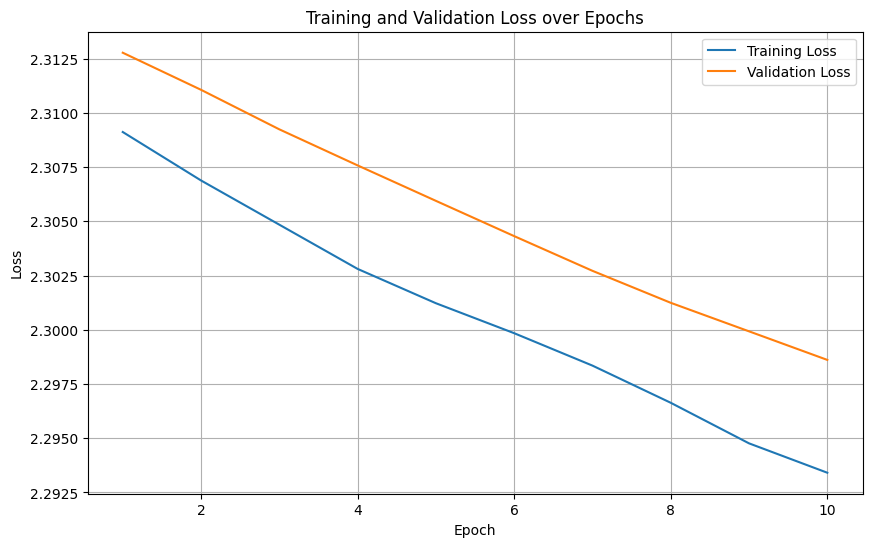

Loss visualization complete.


In [ ]:
# --- 12. Visualize Training Loss ---

# Assume 'history' object (from model.fit) and 'epochs' variable are defined from previous steps.
# Assume matplotlib.pyplot is imported (e.g., import matplotlib.pyplot as plt)

print("\nVisualizing training and validation loss...")

# Define training loss from history of model
training_loss = history.history['loss'] # Access the list of training loss values

# Define validation loss from history of model
validation_loss = history.history['val_loss'] # Access the list of validation loss values

# create a list of number of epochs done while training
# The 'epochs' variable holds the total number of epochs the model was trained for.
# The range function will generate numbers from 0 up to (but not including) epochs.
# We add 1 to start the plot from Epoch 1 instead of Epoch 0.
epochs_list = range(1, epochs + 1)

# plot line plot of Training Loss and Validation Loss
plt.figure(figsize=(10, 6)) # Set figure size for better readability
plt.plot(epochs_list, training_loss, label='Training Loss')
plt.plot(epochs_list, validation_loss, label='Validation Loss')

# Add title and labels for clarity
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() # Show the legend to identify which line is which
plt.grid(True) # Add a grid for easier reading

# Display the plot
plt.show()

print("Loss visualization complete.")

The plot shows the reduction in loss after training model for 10 epochs. Till the end of teh 10th epoch the loss
reduced from approx 1.35 to approx 1.16 on training set and approx 1.5 to approx 1.2 on validation set.

# Visualize the Accuracy of model


Visualizing training and validation accuracy...


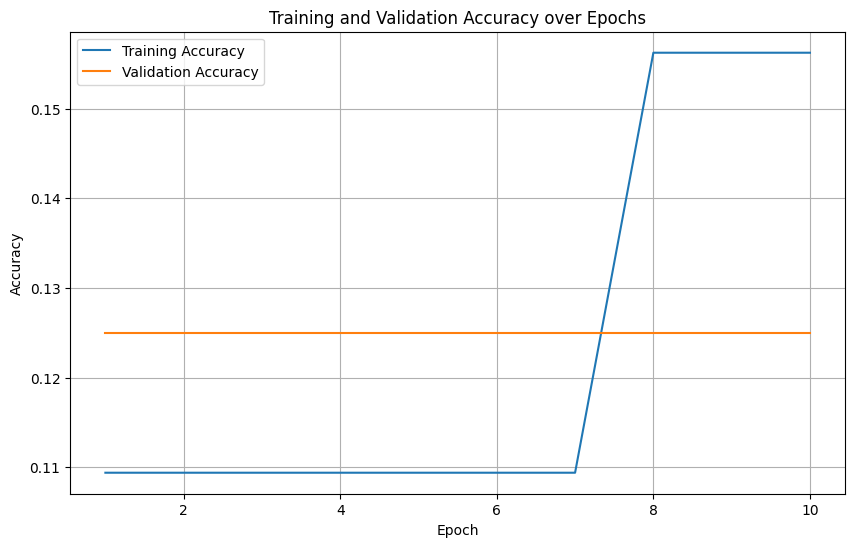

Accuracy visualization complete.


In [ ]:
# --- 12. Visualize Training Accuracy ---

# Assume 'history' object (from model.fit) and 'epochs' variable are defined from previous steps.
# Assume matplotlib.pyplot is imported (e.g., import matplotlib.pyplot as plt)

print("\nVisualizing training and validation accuracy...")

# Define training accuracy from history of model
# We named the accuracy metric 'accuracy' during the compile step
training_accuracy = history.history['accuracy']

# Define validation accuracy from history of model
validation_accuracy = history.history['val_accuracy']

# create a list of number of epochs done while training
# Re-create or use the same list of epoch numbers as used for the loss plot
epochs_list = range(1, epochs + 1)

# plot line plot of Training Accuracy and Validation Accuracy
# (Note: Your comment mentioned plotting Loss again, but based on the
# variable names, we assume you intended to plot Accuracy)
plt.figure(figsize=(10, 6)) # Set figure size for better readability
plt.plot(epochs_list, training_accuracy, label='Training Accuracy')
plt.plot(epochs_list, validation_accuracy, label='Validation Accuracy')

# Add title and labels for clarity
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() # Show the legend to identify which line is which
plt.grid(True) # Add a grid for easier reading

# Display the plot
plt.show()

print("Accuracy visualization complete.")

The plot shows the increase in accuracy after training model for 10 epochs. Till the end of teh 10th epoch the accuracy increased from approx 54% to approx 60% on training set and approx 56% to approx 59% on validation set.

In [ ]:
# --- 13. Make Predictions ---

# Assume 'model' is trained and 'x_test_rgb' (processed test features)
# are defined from previous steps.
# Assume numpy is imported (e.g., import numpy as np)

print("\nMaking predictions on the test set...")

# Make predictions on the test set
# The predict method returns the model's output for each sample in the input batch.
# Since our model's last layer has no activation and from_logits=True was used in loss,
# the output here will be raw logits (scores for each class).
predictions = model.predict(x_test_rgb)

print("Predictions made.")
# The shape of 'predictions' will be (n_test_samples, num_classes)
print(f"Shape of predictions: {predictions.shape}")

# Display the raw predictions for the first few test samples
# print("\nRaw predictions (logits) for first 5 test samples:")
# print(predictions[:5])

# To get the predicted class index for each sample from the logits,
# we find the index with the highest score for each sample.
predicted_classes = np.argmax(predictions, axis=1)

# print("\nPredicted class indices for first 5 test samples:")
# print(predicted_classes[:5])

# The 'predicted_classes' variable now holds the integer class label
# that the model predicted for each image in the test set.
# You can compare this to the true labels (y_test) for evaluation or visualization.


Making predictions on the test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions made.
Shape of predictions: (20, 10)


In [ ]:
# --- 14. Evaluate Model on Test Set ---

# Assume 'model' is trained and 'x_test_rgb' (processed test features)
# and 'y_test' (test labels) are defined from previous steps.

print("\nEvaluating the model on the test set...")

# Evaluate the model
# x: Test data features
# y: Test data labels
# verbose=0: Suppresses the progress bar during evaluation.
#            Set to 1 or 2 to see progress.
test_results = model.evaluate(x_test_rgb, y_test, verbose=0)

# The evaluate method returns the values of the loss and metrics
# specified during the compile step, in the order they were listed.
# Assuming your metrics were [SparseCategoricalAccuracy(name='accuracy')],
# the return value will be [test_loss, test_accuracy].
# You can unpack the results into variables:
test_loss, test_accuracy = test_results # Unpack the list into individual variables

print("Model evaluation complete.")
print(f"Test Loss: {test_loss:.4f}") # Print loss formatted to 4 decimal places
print(f"Test Accuracy: {test_accuracy:.4f}") # Print accuracy formatted to 4 decimal places

# 'test_loss' and 'test_accuracy' variables now hold the final performance
# metrics on the test set.


Evaluating the model on the test set...
Model evaluation complete.
Test Loss: 2.3153
Test Accuracy: 0.0500


After evaluating the model on test set we got the accuracy approx 59%


Visualizing sample predictions on test data:


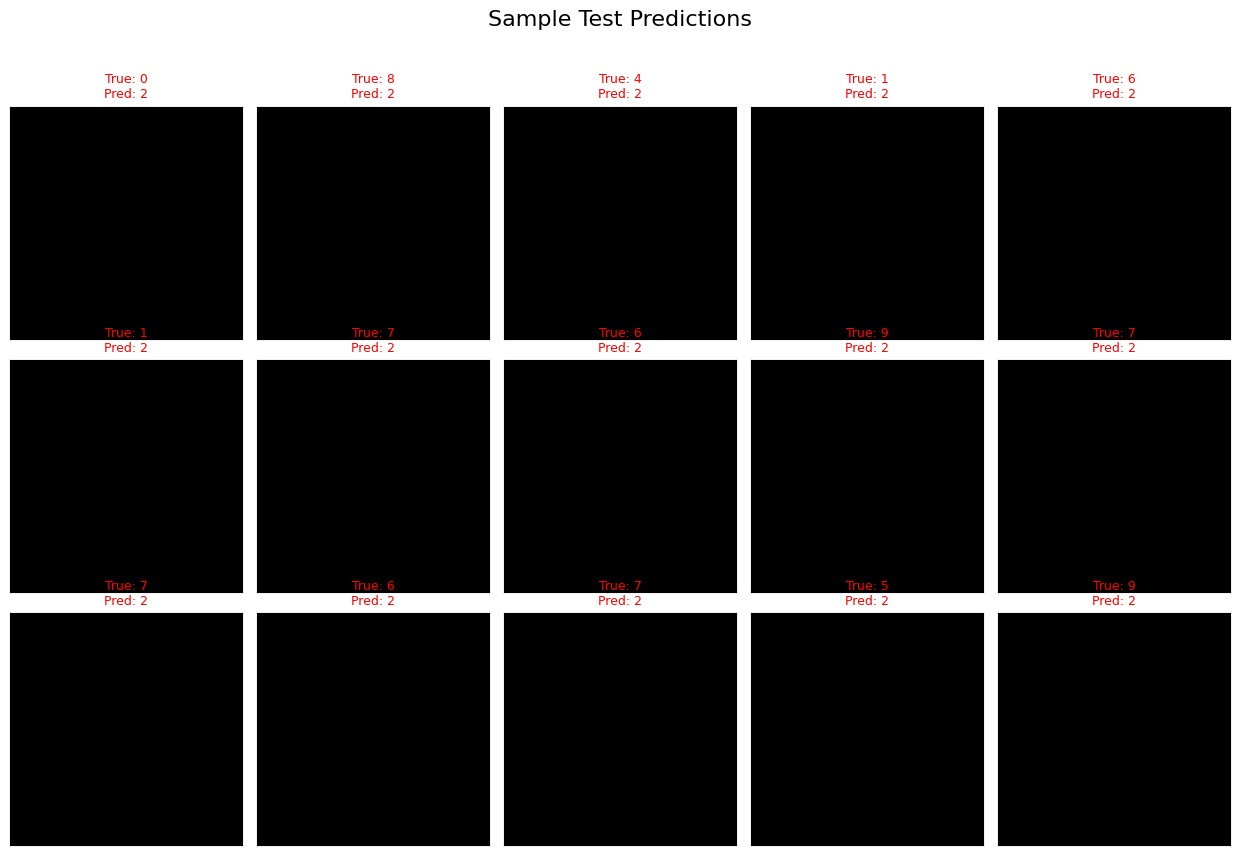

Sample predictions visualized.


In [ ]:
# --- 15. Visualize Sample Predictions ---

# Assume 'x_test_rgb' (processed test features), 'y_test' (true test labels),
# and 'predicted_classes' (model's predictions) are defined from previous steps.
# Assume matplotlib.pyplot is imported (e.g., import matplotlib.pyplot as plt)
# Assume numpy is imported (e.g., import numpy as np)

print("\nVisualizing sample predictions on test data:")

# Define how many samples to show
n_samples_to_show = 15
# Ensure we don't try to show more samples than are in the test set
n_samples_to_show = min(len(x_test_rgb), n_samples_to_show)

# Calculate the layout for the plot grid
n_cols = 5 # Display 5 images per row
n_rows = int(np.ceil(n_samples_to_show / n_cols))

plt.figure(figsize=(n_cols * 2.5, n_rows * 3)) # Set figure size based on layout
plt.suptitle("Sample Test Predictions", fontsize=16) # Add a title for the whole figure

# loop through predicted list and true label list simultaneously using zip function
# and iterate through the first n_samples_to_show images
for i in range(n_samples_to_show):
    # Get the image, true label, and predicted label for the current sample
    image = x_test_rgb[i]
    true_label = y_test[i]
    predicted_label = predicted_classes[i]

    # Create a subplot for each image
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # Display the image (imshow handles RGB format)
    plt.imshow(image)

    # Set the title to show both true and predicted labels
    # Use color to highlight if the prediction was correct or wrong
    title_color = "green" if true_label == predicted_label else "red"
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=9, color=title_color)

    # Turn off axes ticks for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the suptitle

# Display the plot
plt.show()

print("Sample predictions visualized.")

From above cell we can consider that the prediction made by the model are coorect for more than 50% of the data. the accuarcy is still not excellent but its working fine.

# Project Summary

When dealing with multi-class classification problem:

1. we can use integer numbers or one-hot-encoding to encode the true classes/label
2. The correct accuracy meterics depends on the selected true label encoding.
3. Last layer activation function could be Sigmoid, Softmax or None
4. The correct loss function should be decided acording to the selected true label encoding

# Conclusion

We used transfer learning by importing MobileNetV2.
Training model after  resizing, scaling, selecting the correct loss and activation function we got an accuary of approx to 60% and training loss of 1.17.

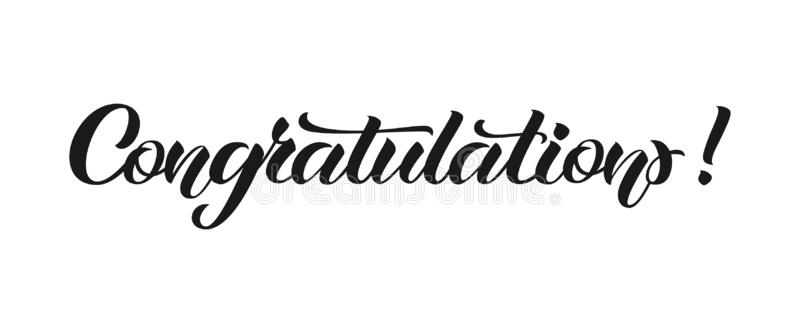

## You have completed this project and now you are able to implement model training using transfer learning and got good knowledge of building projects.

## Feedback

Please fill the below feedback form about this assignment

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s